# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/laurenkrohn/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [ ]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q="bitcoin or btc", language="en")
btc_news

In [ ]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q="ethereum", language="en")
eth_news

In [19]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-09,"BTC fell to its lowest level since last July, ...",0.1027,0.076,0.066,0.859
1,2022-05-09,Did you hear? You may be able to allocate some...,0.1280,0.045,0.000,0.955
2,2022-04-19,<ul><li>Elon Musk will be able to focus on Tes...,0.4404,0.079,0.000,0.921
3,2022-05-03,Good morning. The combo of hawkish Fed policy ...,0.2732,0.170,0.118,0.713
4,2022-04-19,In a world where centralized finance is strugg...,0.2382,0.100,0.075,0.826


In [87]:
# Defining a function to create the dataframe:
def create_sentiments_df(news):
    news_sentiments = []
    for article in news["articles"]:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
        
            news_sentiments.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu
            
            })
        
        except AttributeError:
            pass
    
# Create DataFrame for sentiments
    df = pd.DataFrame(news_sentiments)
    cols = ["date", "title", "description", "text", "compound", "positive", "negative", "neutral"]
    df = df[cols]
    return df

In [88]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = create_sentiments_df(eth_news)
eth_sentiments

,date,title,description,text,compound,positive,negative,neutral
0,2022-04-14,US blames North Korean hacker group for $625 m...,The US Department of Treasury has attributed t...,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.231,0.681
1,2022-04-13,Wikipedia community votes to stop accepting cr...,Critics argue the bitcoin and ethereum network...,"18 with 15 posters participating, including st...",0.1027,0.084,0.071,0.844
2,2022-04-15,Opera's crypto browser is now available on iOS,"Opera launched its dedicated ""Crypto Browser"" ...","Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.000,0.812
3,2022-05-02,Yuga Labs apologises after sale of virtual lan...,Demand for plots of land in multiplayer game O...,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879
4,2022-05-04,How Bored Ape Yacht Club Broke Ethereum - CNET,"Transactions stalled for hours, and people pai...",When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945
5,2022-04-14,Jailed US Ethereum developer sets example for ...,An Ethereum developer was sentenced to more th...,The news: A former developer of the cryptocurr...,-0.2960,0.057,0.114,0.829
6,2022-04-26,Cryptoverse: Ether prepares for epic 'merge' i...,Ether has promised to do better. It has promis...,April 26 (Reuters) - Ether has promised to do ...,0.5346,0.142,0.000,0.858
7,2022-04-26,What is the Ethereum merge and how could it ma...,Ethereum is preparing for an upgrade that’s be...,Ethereum is preparing for an upgrade thats bee...,0.2716,0.065,0.000,0.935
8,2022-04-18,You Can Now Go See Fantastic Beasts With Dogec...,Dogecoiners unite! Movie theater chain AMC has...,Dogecoiners unite! Movie theater chain AMC has...,0.4003,0.078,0.000,0.922
9,2022-05-01,Sale of Bored Apes' Metaverse Land Made Gas Fe...,There's a new metaverse project from the creat...,There's a new metaverse project from the creat...,-0.2732,0.000,0.063,0.937


In [22]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.228425,0.077000,0.027750,0.895350
std,0.271164,0.061003,0.040995,0.079955
min,-0.325200,0.000000,0.000000,0.713000
25%,0.077025,0.043750,0.000000,0.851000
50%,0.232250,0.076500,0.000000,0.907500
75%,0.422225,0.105500,0.045250,0.955000
max,0.834100,0.240000,0.125000,1.000000


In [23]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.00000,20.00000,20.000000,20.000000
mean,-0.12974,0.04120,0.070250,0.888550
std,0.40896,0.05516,0.071528,0.080061
min,-0.78450,0.00000,0.000000,0.681000
25%,-0.31745,0.00000,0.000000,0.840250
50%,-0.24975,0.00000,0.063000,0.921000
75%,0.10270,0.07650,0.077750,0.937000
max,0.73510,0.18800,0.233000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest average positive score, at 0.077, compared to the average positive score of 0.0412 for Ethereum.

Q: Which coin had the highest compound score?

A: Bitcoin had the highest (max) compound score, at 0.83 to Ethereum's 0.735.

Q. Which coin had the highest positive score?

A: Bitcoin had the highest (max) positive score, at 0.24, compared to the max positive score of 0.188 reached by Ethereum.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [165]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [145]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# The stopwords list from nltk is a good starting set of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary


# Creating a function "add_sw" to add more stopwords later if necessary
def add_sw(sw_set, stopword):
# I want to pass my current set of stopwords into the function
    sw = sw_set
# To add words I'll use |= (a "Union Set Separator"). 
# This will only add new stopwords to my existing stopwords set if the word
# isn't already in the set.
    sw |= {stopword}
    return sw

#sw = add_sw(sw, "aardvark")
#sw = add_sw(sw, "aaa")
#sw
# Noting that this function "add_sw" works to add one stopword.

# Creating another function to add more than one word at a time:
def sw_addon(sw_set, addon_set):
    sw = sw_set.union(addon_set)
    return sw

sw_add = {'since', 'last', 'week', 'year', 'char', 'ha', 'year', 'reuters', 'closebitcoin', 'could', 'would', 'also'}
sw = sw_addon(sw, sw_add)
#sw
# Confirming that this function also works, and is better because it 
# allows you to add more than one stopword at a time.

In [192]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for i in text:
        if i in punc:
            text = text.replace(i, "")

    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase (and remove stop words)
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove the stop words
    # Already removed in list comprehension (above)
    
    return tokens

In [193]:
# Create a new tokens column for Bitcoin

# I want to alter my function to add the column at the same time the 
# other data is downloaded, so nothing gets split up:
def create_tokens_df(news):
    news_sentiments = []
    for article in news["articles"]:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            tok = tokenizer(text)
        
            news_sentiments.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu,
                "tokens": tok
            
            })
        
        except AttributeError:
            pass
    
# Create DataFrame for sentiments
    df = pd.DataFrame(news_sentiments)
    cols = ["date", "title", "description", "text", "tokens", "compound", "positive", "negative", "neutral"]
    df = df[cols]
    return df

In [194]:
btc_tokens_df = create_tokens_df(btc_news)
btc_tokens_df.head()

,date,title,description,text,tokens,compound,positive,negative,neutral
0,2022-05-09,"Bitcoin, Ethereum Technical Analysis: BTC Slip...","<ol><li>Bitcoin, Ethereum Technical Analysis: ...","BTC fell to its lowest level since last July, ...","[btc, fell, lowest, level, july, price, droppe...",0.1027,0.076,0.066,0.859
1,2022-05-09,Protecting Retirement Savings from Volatile Cr...,Did you hear? You may be able to allocate some...,Did you hear? You may be able to allocate some...,"[hear, may, able, allocate, k, retirement, sav...",0.1280,0.045,0.000,0.955
2,2022-04-19,3 Reddit Stocks That Could Roar in Q2,The trick to sifting through Reddit stocks is ...,<ul><li>Elon Musk will be able to focus on Tes...,"[ullielon, musk, able, focus, onteslatsla, pro...",0.4404,0.079,0.000,0.921
3,2022-05-03,10 things before the opening bell,Today we're breaking down why top Wall Street ...,Good morning. The combo of hawkish Fed policy ...,"[good, morning, combo, hawkish, fed, policy, h...",0.2732,0.170,0.118,0.713
4,2022-04-19,What’s Defi And Is It Worth It? Decentralized ...,In a world where centralized finance is strugg...,In a world where centralized finance is strugg...,"[world, centralized, finance, struggling, dece...",0.2382,0.100,0.075,0.826


In [195]:
# Create a new tokens column for Ethereum
eth_tokens_df = create_tokens_df(eth_news)
eth_tokens_df.head()

,date,title,description,text,tokens,compound,positive,negative,neutral
0,2022-04-14,US blames North Korean hacker group for $625 m...,The US Department of Treasury has attributed t...,The US Department of Treasury says Lazarus is ...,"[us, department, treasury, say, lazarus, behin...",-0.7845,0.088,0.231,0.681
1,2022-04-13,Wikipedia community votes to stop accepting cr...,Critics argue the bitcoin and ethereum network...,"18 with 15 posters participating, including st...","[poster, participating, including, story, auth...",0.1027,0.084,0.071,0.844
2,2022-04-15,Opera's crypto browser is now available on iOS,"Opera launched its dedicated ""Crypto Browser"" ...","Opera launched its dedicated ""Crypto Browser"" ...","[opera, launched, dedicated, crypto, browser, ...",0.7351,0.188,0.000,0.812
3,2022-05-02,Yuga Labs apologises after sale of virtual lan...,Demand for plots of land in multiplayer game O...,A multi-billion dollar cryptocurrency company ...,"[multibillion, dollar, cryptocurrency, company...",-0.2263,0.046,0.075,0.879
4,2022-05-04,How Bored Ape Yacht Club Broke Ethereum - CNET,"Transactions stalled for hours, and people pai...",When Bored Ape Yacht Club creators Yuga Labs a...,"[bored, ape, yacht, club, creator, yuga, labs,...",-0.2732,0.000,0.055,0.945


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [196]:
from collections import Counter
from nltk import ngrams

In [197]:
# First I want to convert my df tokens columns into lists, which will
# better allow me to count all the words attributable to each coin.
btc_tokens = btc_tokens_df['tokens'].to_list()

# This is still a list of lists, so I want to flatten it
btc_tokens_flat = [token for sublist in btc_tokens for token in sublist]


In [198]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = Counter(ngrams(btc_tokens_flat, n=2))
#print(dict(btc_bigram_counts))
print(dict(btc_bigram_counts.most_common(10)))

{('bitcoin', 'btc'): 8, ('supply', 'limit'): 2, ('shortterm', 'downtrend'): 2, ('btc', 'fell'): 1, ('fell', 'lowest'): 1, ('lowest', 'level'): 1, ('level', 'july'): 1, ('july', 'price'): 1, ('price', 'dropped'): 1, ('dropped', 'start'): 1}


In [199]:
# Generate the Ethereum N-grams where N=2
eth_tokens = eth_tokens_df['tokens'].to_list()
eth_tokens_flat = [token for sublist in eth_tokens for token in sublist]
eth_bigram_counts = Counter(ngrams(eth_tokens_flat, n=2))
#print(dict(eth_bigram_counts))
print(dict(eth_bigram_counts.most_common(10)))

{('previous', 'world'): 3, ('world', 'biggest'): 3, ('biggest', 'bestknown'): 3, ('bestknown', 'cryptocurrency'): 3, ('yacht', 'club'): 2, ('bitcoin', 'dropped'): 2, ('cryptocurrency', 'low'): 2, ('low', 'may'): 2, ('may', 'bitcoin'): 2, ('us', 'department'): 1}


In [200]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [201]:
# Use token_count to get the top 10 words for Bitcoin
btc_token_count = token_count(btc_tokens_flat, 10)
btc_token_count

[('bitcoin', 17),
 ('btc', 9),
 ('market', 6),
 ('price', 5),
 ('cryptocurrency', 3),
 ('world', 3),
 ('bitcoinbtc', 3),
 ('financial', 3),
 ('monday', 3),
 ('able', 2)]

In [175]:
# Use token_count to get the top 10 words for Ethereum
eth_token_count = token_count(eth_tokens_flat, 10)
eth_token_count

[('cryptocurrency', 9),
 ('ethereum', 6),
 ('bitcoin', 6),
 ('april', 4),
 ('biggest', 4),
 ('world', 4),
 ('us', 3),
 ('crypto', 3),
 ('nft', 3),
 ('dropped', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [176]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [177]:
# I want to define a function to create a flat list for the ETH tokens
def create_flat_token_set(df, token_column="tokens"):
    tokens = df[token_column].to_list()
    tokens_flat = [token for sublist in tokens for token in sublist]
    tokens_set = set(tokens_flat)
    return tokens_set

In [202]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [204]:
# Using just my flat tokens I'm getting an error with the WordCloud,
# so adding a line to better feed into what WordCloud expects.
btc_cloud = ' '.join(btc_tokens_flat)

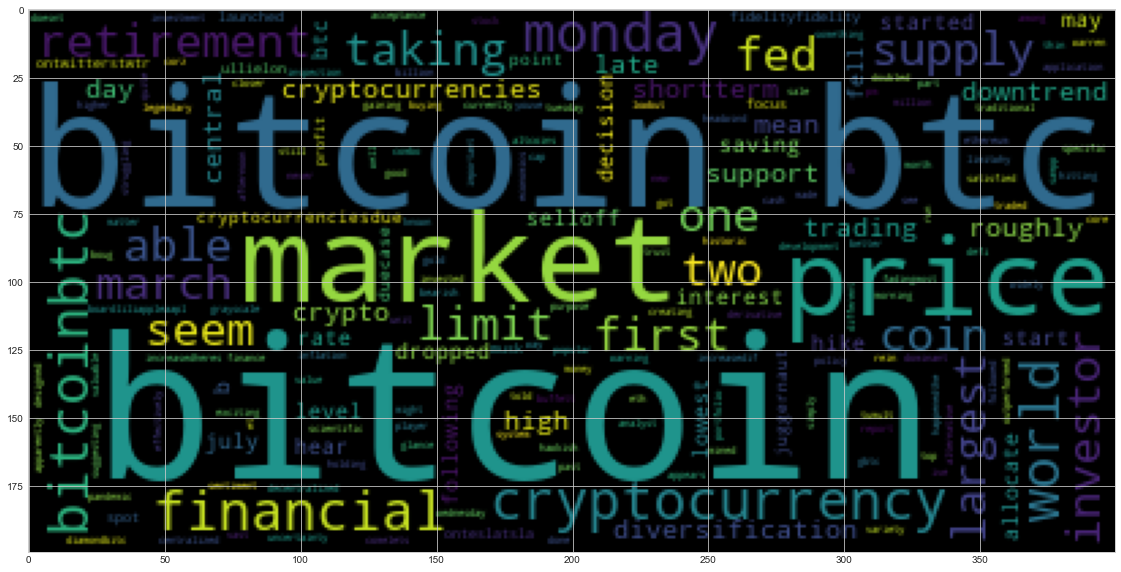

In [206]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(btc_cloud)
plt.imshow(btc_wc)

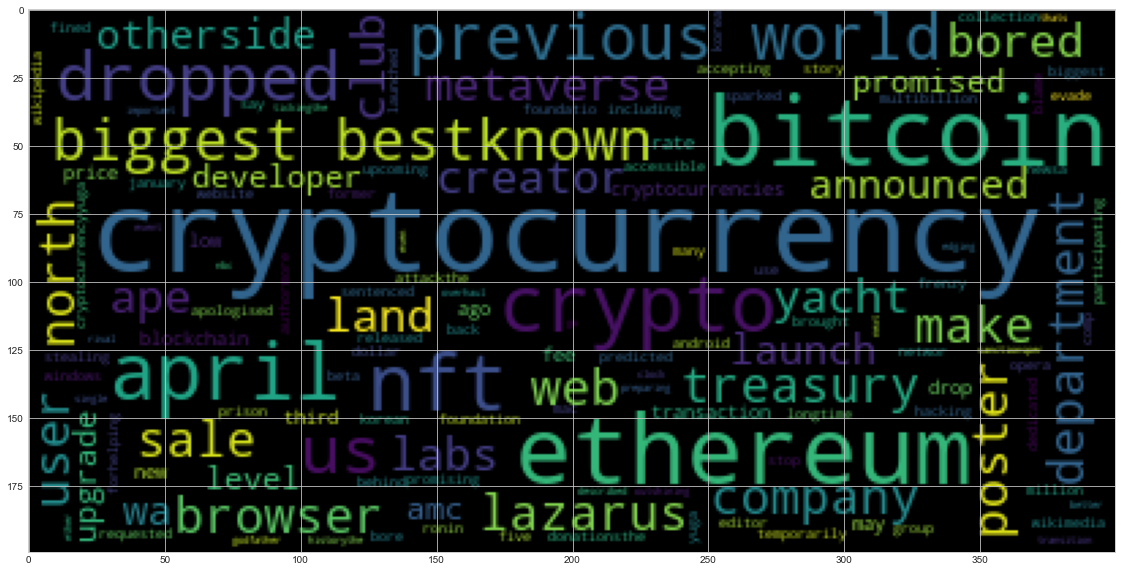

In [207]:
# Generate the Ethereum word cloud
eth_cloud = ' '.join(eth_tokens_flat)
eth_wc = WordCloud().generate(eth_cloud)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

In [28]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [29]:
# Render the visualization
# YOUR CODE HERE!

In [30]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
# YOUR CODE HERE!

In [34]:
# List all Entities
# YOUR CODE HERE!

---